# 3가지 종목 선정
1. 삼성전자
2. 이더리움 클래식(ETC-USD)
3. 이더리움(ETH-USE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# 삼성전자
dataset_filepath1 = './005930.KS.csv'
# 이더리움 클래식
dataset_filepath2 = './ETC-USD.csv'
# 이더리움
dataset_filepath3 = './ETH-USD.csv'

df1 = pd.read_csv(dataset_filepath1, index_col='Date', parse_dates=True)
df2 = pd.read_csv(dataset_filepath2, index_col='Date', parse_dates=True)
df3 = pd.read_csv(dataset_filepath3, index_col='Date', parse_dates=True)

ts1 = df1['Close']
ts2 = df2['Close']
ts3 = df3['Close']

ts1.head()
ts2.head()
ts3.head()

Date
2020-09-06    353.362274
2020-09-07    352.673492
2020-09-08    337.602112
2020-09-09    351.110016
2020-09-10    368.101898
Name: Close, dtype: float64

# 데이터 분포 확인
- 3가지 종목에 대하여 그래프를 확인해봄

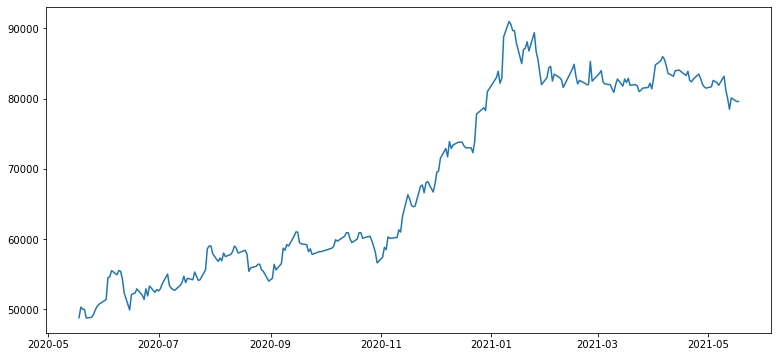

In [2]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

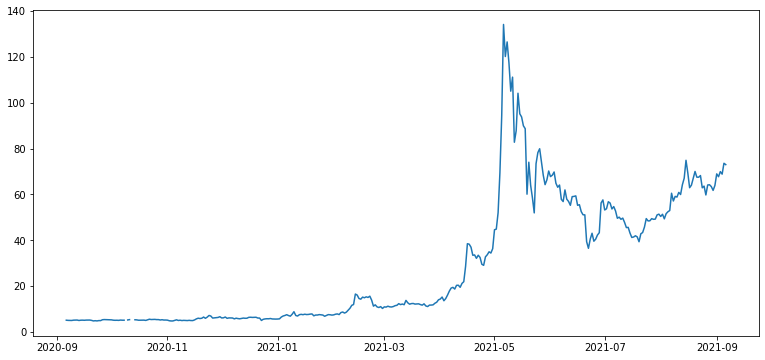

In [3]:
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts2)

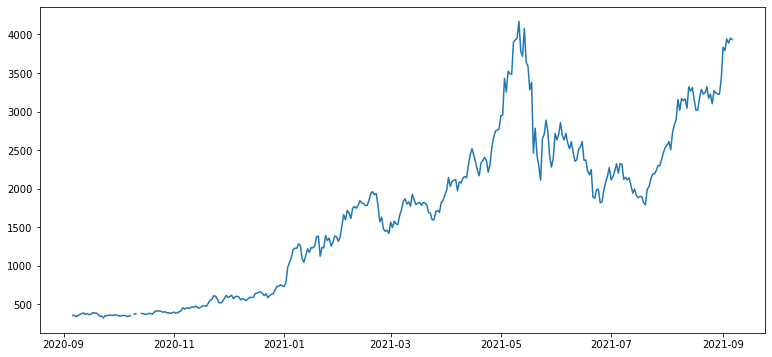

In [4]:
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts3)

# 결측치 확인
- 결측치가 있는 데이터는 모두 지운다.

In [5]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [6]:
ts2[ts2.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2020-10-09   NaN
2020-10-12   NaN
2020-10-13   NaN
Name: Close, dtype: float64

In [7]:
ts3[ts3.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2020-10-09   NaN
2020-10-12   NaN
2020-10-13   NaN
Name: Close, dtype: float64

In [8]:
# 결측치 처리
ts1=ts1.interpolate(method='time')
ts1[ts1.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [9]:
# 결측치 처리
ts2=ts2.interpolate(method='time')
ts2[ts2.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

In [10]:
# 결측치 처리
ts3=ts3.interpolate(method='time')
ts3[ts3.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

# 시계열 분해를 위한 로그스케일 변환

In [11]:
# 로그 변환 시도 
ts_log1 = np.log(ts1)
# ts_log1 = ts1

In [12]:
# 로그 변환 시도 
ts_log2 = np.log(ts2)
# ts_log = ts

In [13]:
# 로그 변환 시도 
ts_log3 = np.log(ts3)
# ts_log = ts

In [14]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [15]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# 데이터 분석
- decompose를 통해 시계열 데이터 분해
- 삼성전자, 이더리움클래식, 이더리움의 1년 데이터를 분해

# 삼성전자
- 분해 전 p-value : 0.59
- 분해 후 p-value : 6.234854e-08

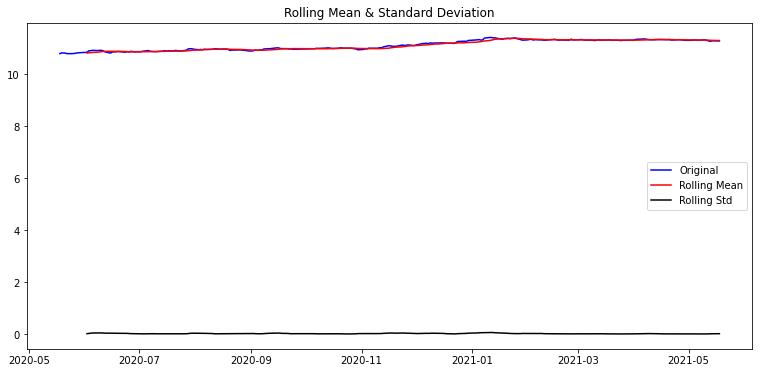

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


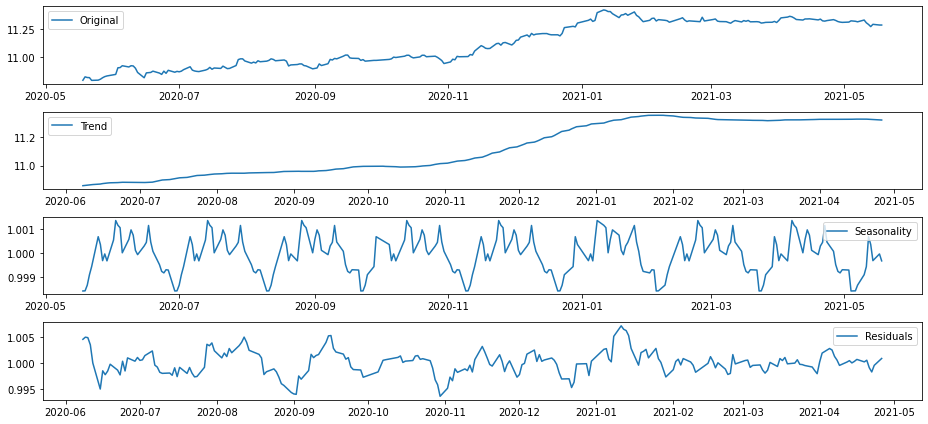

In [16]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log1, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log1)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition1 = seasonal_decompose(ts_log1, model='multiplicative', period = 30) 

trend1 = decomposition1.trend
seasonal1 = decomposition1.seasonal
residual1 = decomposition1.resid

plt.subplot(411)
plt.plot(ts_log1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend1, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal1,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual1, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



In [17]:
residual1.dropna(inplace=True)
augmented_dickey_fuller_test(residual1)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


# 이더리움 클래식
- 분해 전 p-value : 0.902989
- 분해 후 p-value : 8.591065e-12

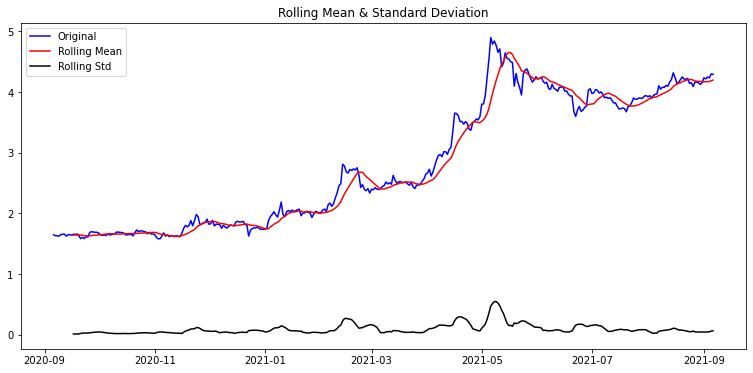

Results of Dickey-Fuller Test:
Test Statistic                  -0.441202
p-value                          0.902989
#Lags Used                       0.000000
Number of Observations Used    365.000000
Critical Value (1%)             -3.448394
Critical Value (5%)             -2.869491
Critical Value (10%)            -2.571006
dtype: float64


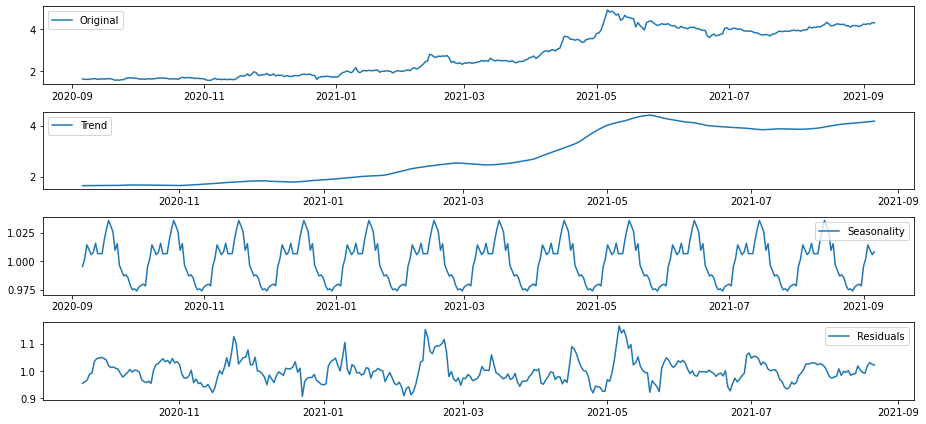

In [18]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log2, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log2)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition2 = seasonal_decompose(ts_log2, model='multiplicative', period = 30) 

trend2 = decomposition2.trend
seasonal2 = decomposition2.seasonal
residual2 = decomposition2.resid

plt.subplot(411)
plt.plot(ts_log2, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [19]:
residual2.dropna(inplace=True)
augmented_dickey_fuller_test(residual2)

Results of Dickey-Fuller Test:
Test Statistic                -7.777501e+00
p-value                        8.591065e-12
#Lags Used                     1.000000e+01
Number of Observations Used    3.250000e+02
Critical Value (1%)           -3.450632e+00
Critical Value (5%)           -2.870474e+00
Critical Value (10%)          -2.571530e+00
dtype: float64


# 이더리움
- 분해 전 p-value : 0.780374
- 분해 후 p-value : 8.591065e-12

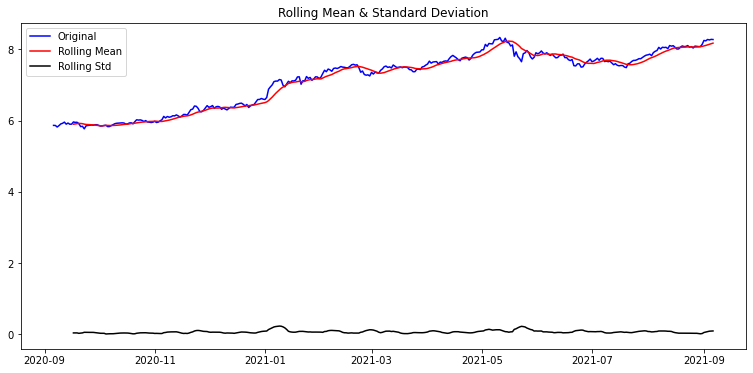

Results of Dickey-Fuller Test:
Test Statistic                  -0.922793
p-value                          0.780374
#Lags Used                      12.000000
Number of Observations Used    353.000000
Critical Value (1%)             -3.449011
Critical Value (5%)             -2.869763
Critical Value (10%)            -2.571151
dtype: float64


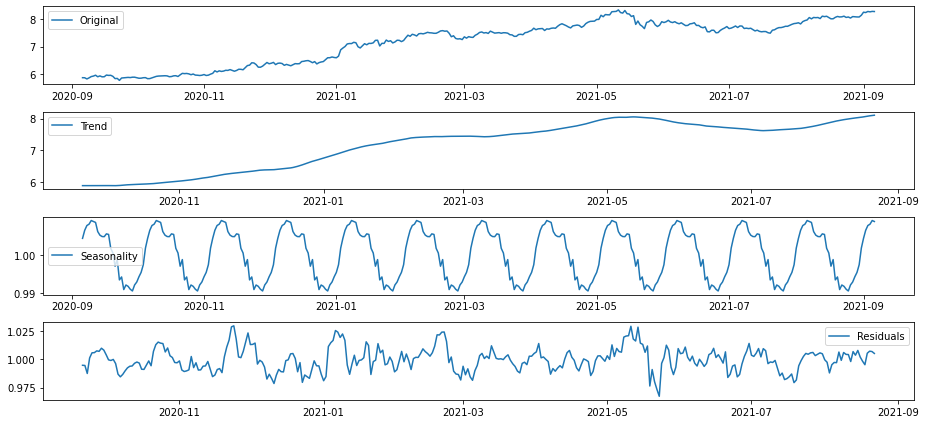

In [20]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log3, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log3)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition3 = seasonal_decompose(ts_log3, model='multiplicative', period = 30) 

trend3 = decomposition3.trend
seasonal3 = decomposition3.seasonal
residual3 = decomposition3.resid

plt.subplot(411)
plt.plot(ts_log3, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend3, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal3,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual3, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [21]:
residual3.dropna(inplace=True)
augmented_dickey_fuller_test(residual3)

Results of Dickey-Fuller Test:
Test Statistic                -6.686867e+00
p-value                        4.204559e-09
#Lags Used                     1.000000e+01
Number of Observations Used    3.250000e+02
Critical Value (1%)           -3.450632e+00
Critical Value (5%)           -2.870474e+00
Critical Value (10%)          -2.571530e+00
dtype: float64


# train test split

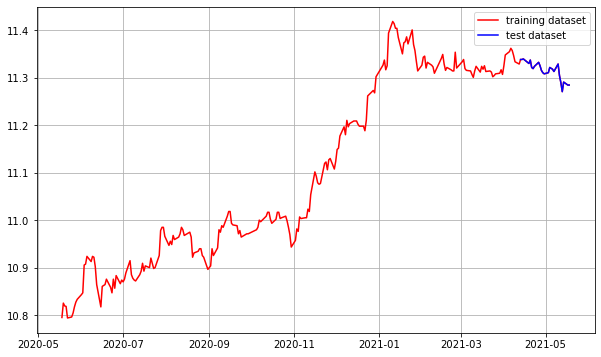

In [22]:
train_data1, test_data1 = ts_log1[:int(len(ts_log1)*0.9)], ts_log1[int(len(ts_log1)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log1, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data1, c='b', label='test dataset')
plt.legend()

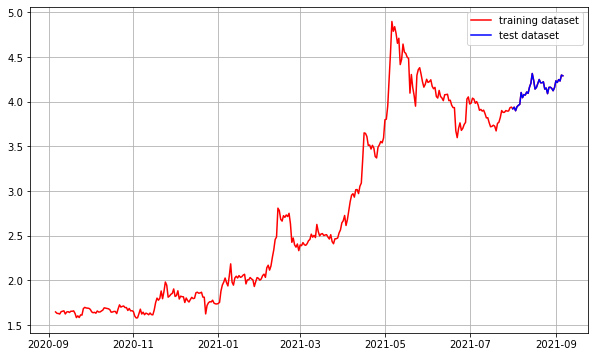

In [23]:
train_data2, test_data2 = ts_log2[:int(len(ts_log2)*0.9)], ts_log2[int(len(ts_log2)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log2, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data2, c='b', label='test dataset')
plt.legend()

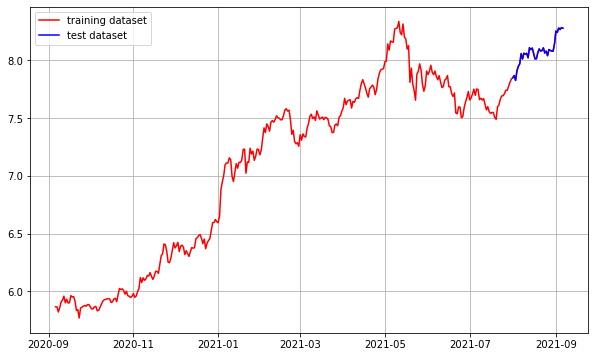

In [24]:
train_data3, test_data3 = ts_log3[:int(len(ts_log3)*0.9)], ts_log3[int(len(ts_log3)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log3, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data3, c='b', label='test dataset')
plt.legend()

# 모수결정 (p,d,q)
- ACF, PACF 데이터를 통해 ARIMA에 들어갈 모수를 결정한다.
- 세 모델 모두 PACF가 1이후부터 0으로 수렴하게된다.
- AR(1)모델을 사용하는것이 좋을 수 있다.
- 적절한 q는 없다.
  - 0~8까지 모두 테스트를 해봤지만 모두 1%이내의 비슷한 성능을 보임.
- d는 삼성전자, 이더리움클래식은 1차분때 p-value가 낮게 나오고 이더리움은 2차분때 더 높게 나온다.
  - 하지만 d를 2로 설정할시 51%의 mape값이 나와서 사용하지 않는다.

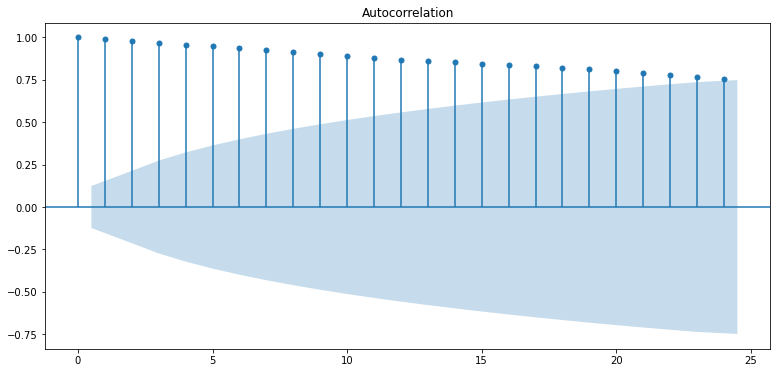

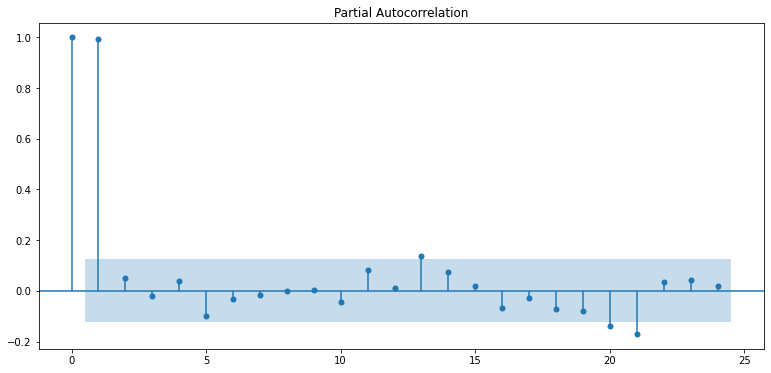

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log1)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log1)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

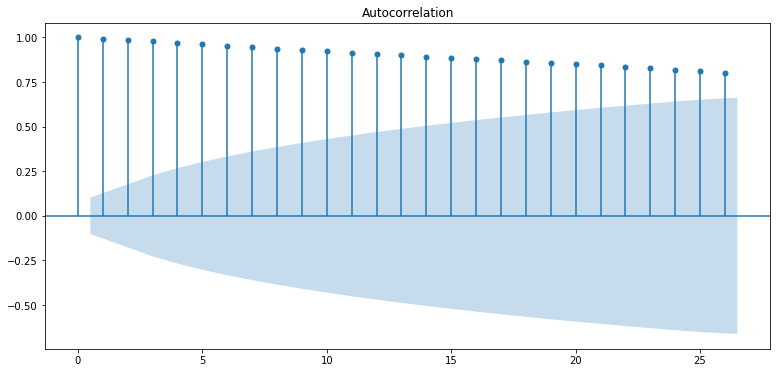

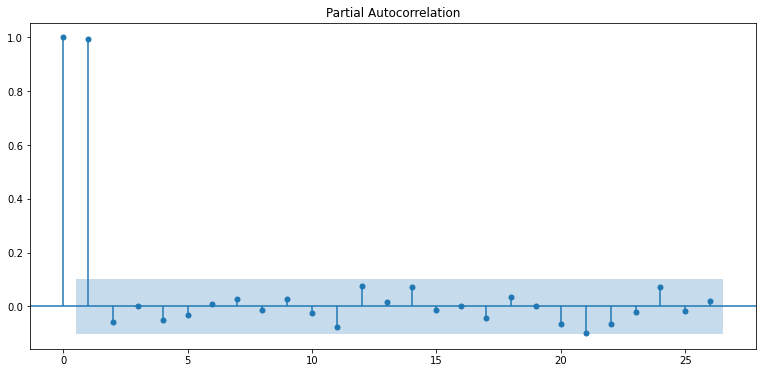

In [26]:
plot_acf(ts_log2)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log2)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

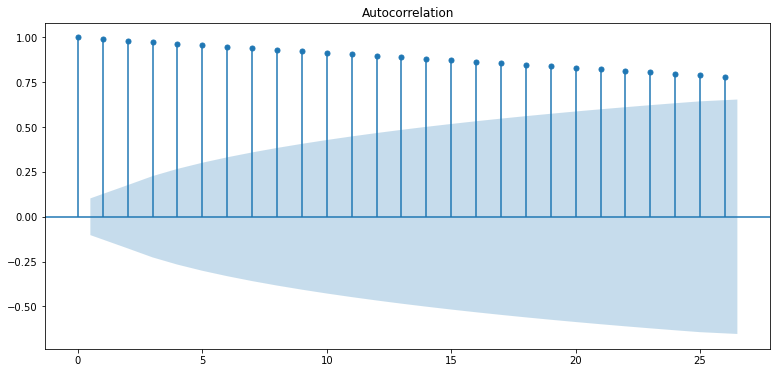

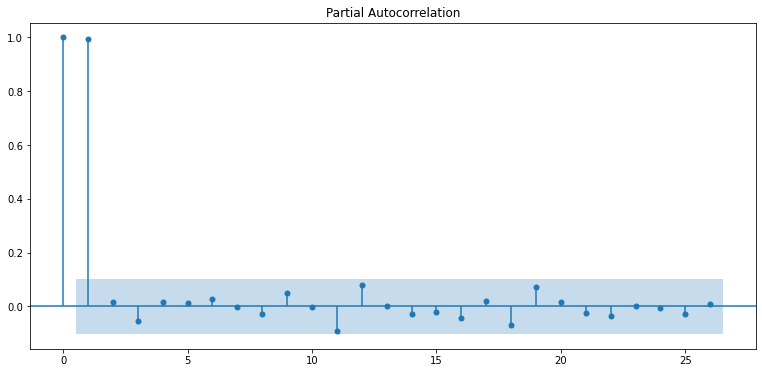

In [27]:
plot_acf(ts_log3)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log3)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


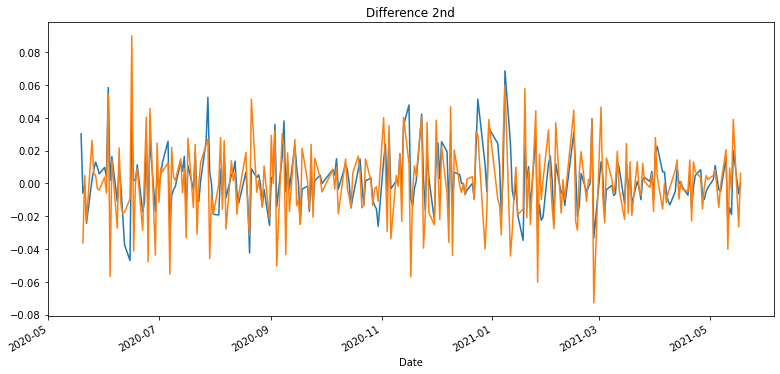

In [28]:
# 1차 차분 구하기
diff_11 = ts_log1.diff(periods=1).iloc[1:]
diff_11.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_11)

# 혹시 필요한 경우 2차 차분 구하기
diff_21 = diff_11.diff(periods=1).iloc[1:]
diff_21.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_21)

Results of Dickey-Fuller Test:
Test Statistic                -1.787232e+01
p-value                        3.024290e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.640000e+02
Critical Value (1%)           -3.448443e+00
Critical Value (5%)           -2.869513e+00
Critical Value (10%)          -2.571018e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.516605e+00
p-value                        1.129641e-13
#Lags Used                     1.700000e+01
Number of Observations Used    3.460000e+02
Critical Value (1%)           -3.449392e+00
Critical Value (5%)           -2.869930e+00
Critical Value (10%)          -2.571240e+00
dtype: float64


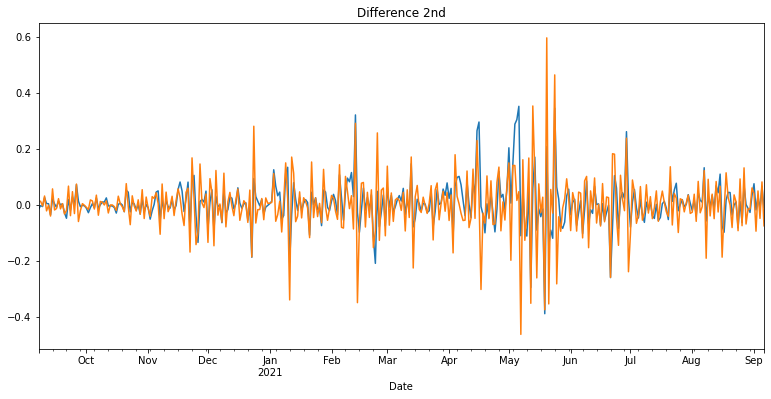

In [29]:
# 1차 차분 구하기
diff_12 = ts_log2.diff(periods=1).iloc[1:]
diff_12.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_12)

# 혹시 필요한 경우 2차 차분 구하기
diff_22 = diff_12.diff(periods=1).iloc[1:]
diff_22.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_22)

Results of Dickey-Fuller Test:
Test Statistic                -5.762906e+00
p-value                        5.618286e-07
#Lags Used                     1.100000e+01
Number of Observations Used    3.530000e+02
Critical Value (1%)           -3.449011e+00
Critical Value (5%)           -2.869763e+00
Critical Value (10%)          -2.571151e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.195404e+01
p-value                        4.250728e-22
#Lags Used                     8.000000e+00
Number of Observations Used    3.550000e+02
Critical Value (1%)           -3.448906e+00
Critical Value (5%)           -2.869716e+00
Critical Value (10%)          -2.571126e+00
dtype: float64


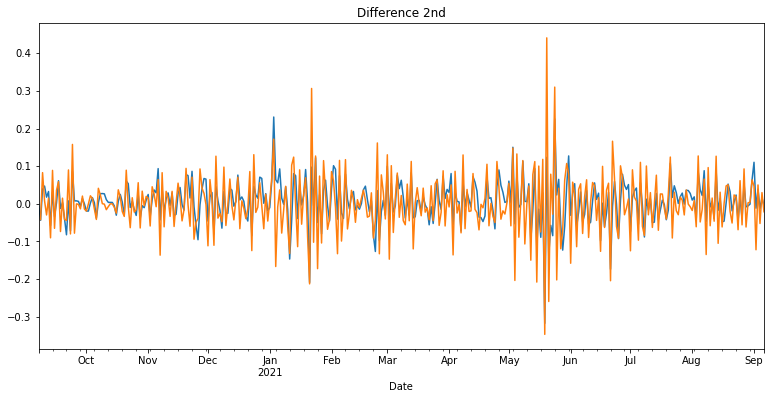

In [30]:
# 1차 차분 구하기
diff_13 = ts_log3.diff(periods=1).iloc[1:]
diff_13.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_13)

# 혹시 필요한 경우 2차 차분 구하기
diff_23 = diff_13.diff(periods=1).iloc[1:]
diff_23.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_23)

# 모델 학습
- 세 모델 모두 위에서 한 분석에 의하여 (p = 1,d = 1,q = 0)로 설정해서 사용함

In [31]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model1 = ARIMA(train_data1, order=(1, 1, 0))  
fitted_m1 = model1.fit(disp=-1)  
print(fitted_m1.summary())

c:\users\juhwan\anaconda3\envs\aiffel\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\juhwan\anaconda3\envs\aiffel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it h

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 8)   Log Likelihood                 586.772
Method:                       css-mle   S.D. of innovations              0.018
Date:                Tue, 07 Sep 2021   AIC                          -1151.544
Time:                        21:01:42   BIC                          -1114.016
Sample:                             1   HQIC                         -1136.396
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      2.247      0.025       0.000       0.004
ar.L1.D.Close    -0.7031      0.267     -2.633      0.008      -1.226      -0.180
ma.L1.D.Close     0.7304      0.268     

In [32]:
# Build Model
model2 = ARIMA(train_data2, order=(1, 1, 0))  
fitted_m2 = model2.fit(disp=-1)  
print(fitted_m1.summary())

c:\users\juhwan\anaconda3\envs\aiffel\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\juhwan\anaconda3\envs\aiffel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, s

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  224
Model:                 ARIMA(1, 1, 8)   Log Likelihood                 586.772
Method:                       css-mle   S.D. of innovations              0.018
Date:                Tue, 07 Sep 2021   AIC                          -1151.544
Time:                        21:01:43   BIC                          -1114.016
Sample:                             1   HQIC                         -1136.396
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0024      0.001      2.247      0.025       0.000       0.004
ar.L1.D.Close    -0.7031      0.267     -2.633      0.008      -1.226      -0.180
ma.L1.D.Close     0.7304      0.268     

c:\users\juhwan\anaconda3\envs\aiffel\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [33]:
# Build Model
model3 = ARIMA(train_data3, order=(1, 1, 0))  
fitted_m3 = model3.fit(disp=-1)  
print(fitted_m3.summary())

c:\users\juhwan\anaconda3\envs\aiffel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\juhwan\anaconda3\envs\aiffel\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\juhwan\anaconda3\envs\aiffel\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warn

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  328
Model:                 ARIMA(1, 1, 8)   Log Likelihood                 488.968
Method:                       css-mle   S.D. of innovations              0.054
Date:                Tue, 07 Sep 2021   AIC                           -955.937
Time:                        21:01:44   BIC                           -914.214
Sample:                    09-07-2020   HQIC                          -939.290
                         - 07-31-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0060      0.003      2.129      0.033       0.000       0.011
ar.L1.D.Close     0.0726      0.225      0.323      0.747      -0.368       0.513
ma.L1.D.Close    -0.1344      0.218     

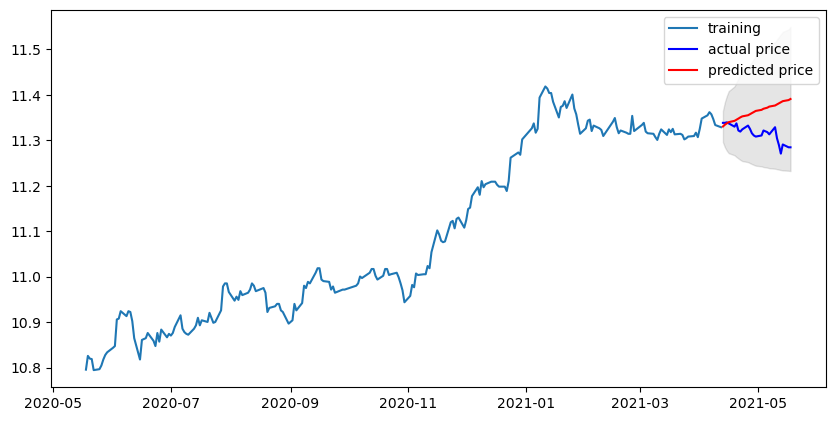

In [34]:

# Forecast : 결과가 fc에 담깁니다. 
fc1, se1, conf1 = fitted_m1.forecast(len(test_data1), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series1 = pd.Series(fc1, index=test_data1.index)   # 예측결과
lower_series1 = pd.Series(conf1[:, 0], index=test_data1.index)  # 예측결과의 하한 바운드
upper_series1 = pd.Series(conf1[:, 1], index=test_data1.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data1, label='training')
plt.plot(test_data1, c='b', label='actual price')
plt.plot(fc_series1, c='r',label='predicted price')
plt.fill_between(lower_series1.index, lower_series1, upper_series1, color='k', alpha=.10)
plt.legend()
plt.show()

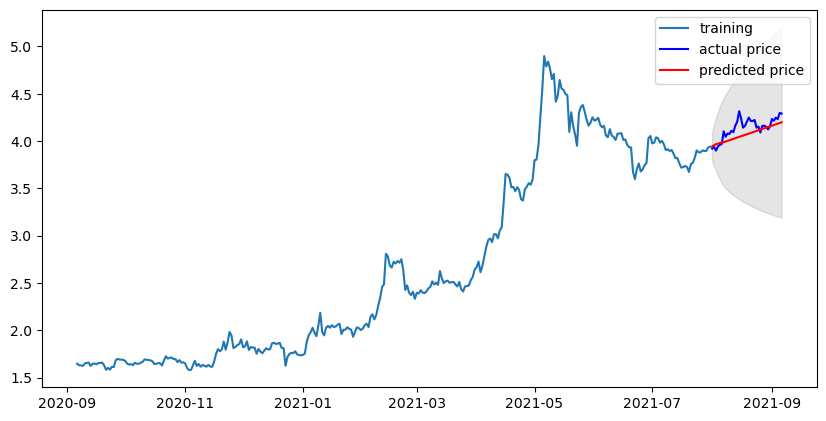

In [35]:
# Forecast : 결과가 fc에 담깁니다. 
fc2, se2, conf2 = fitted_m2.forecast(len(test_data2), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series2 = pd.Series(fc2, index=test_data2.index)   # 예측결과
lower_series2 = pd.Series(conf2[:, 0], index=test_data2.index)  # 예측결과의 하한 바운드
upper_series2 = pd.Series(conf2[:, 1], index=test_data2.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data2, label='training')
plt.plot(test_data2, c='b', label='actual price')
plt.plot(fc_series2, c='r',label='predicted price')
plt.fill_between(lower_series2.index, lower_series2, upper_series2, color='k', alpha=.10)
plt.legend()
plt.show()

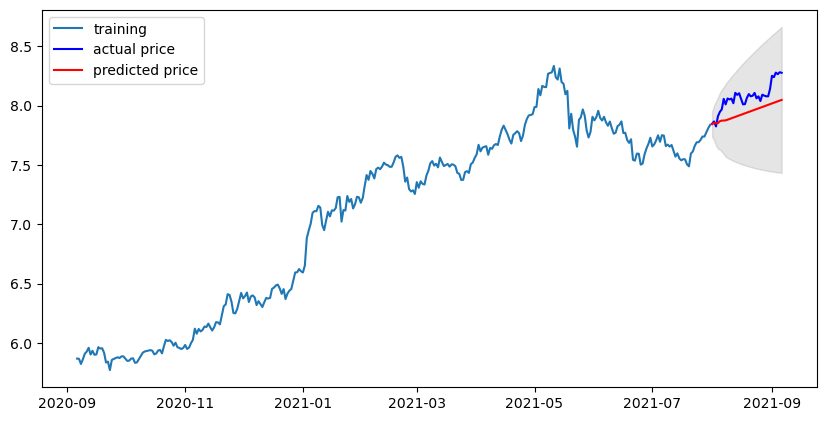

In [36]:
# Forecast : 결과가 fc에 담깁니다. 
fc3, se3, conf3 = fitted_m3.forecast(len(test_data3), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series3 = pd.Series(fc3, index=test_data3.index)   # 예측결과
lower_series3 = pd.Series(conf3[:, 0], index=test_data3.index)  # 예측결과의 하한 바운드
upper_series3 = pd.Series(conf3[:, 1], index=test_data3.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data3, label='training')
plt.plot(test_data3, c='b', label='actual price')
plt.plot(fc_series3, c='r',label='predicted price')
plt.fill_between(lower_series3.index, lower_series3, upper_series3, color='k', alpha=.10)
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data1), np.exp(fc1))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data1), np.exp(fc1))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data1), np.exp(fc1)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc1) - np.exp(test_data1))/np.abs(np.exp(test_data1)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  23803935.456982628
MAE:  3975.941554683223
RMSE:  4878.92769540425
MAPE: 4.91%


In [38]:

mse = mean_squared_error(np.exp(test_data2), np.exp(fc2))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data2), np.exp(fc2))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data2), np.exp(fc2)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc2) - np.exp(test_data2))/np.abs(np.exp(test_data2)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  37.71588983301307
MAE:  4.847945770743522
RMSE:  6.141326390366586
MAPE: 7.36%


In [39]:

mse = mean_squared_error(np.exp(test_data3), np.exp(fc3))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data3), np.exp(fc3))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data3), np.exp(fc3)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc3) - np.exp(test_data3))/np.abs(np.exp(test_data3)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  218018.3513632992
MAE:  409.2139168866941
RMSE:  466.9243529344975
MAPE: 12.14%


# 결과
- p-value말고 다른 성능을 결정하는 수가 있는것 같지만 정확하게 모